##### PAIR PROGRAMMING REGRESIÓN LINEAL 1 - INTRO MACHINE LEARNING

In [3]:
from scipy import stats
from scipy.stats import kurtosistest
from scipy.stats import skew
import statsmodels.api as sm
import ast
import warnings
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10, 8)

# Configuración warnings
# ======================
warnings.filterwarnings('ignore')

# libreria para cambio de tipo de dato de string a lista

# importamos la librería statsmodels para hacer el gráfico de cuantiles teóricos (Q-Q plot)

# importamos esta librería para calcular el sesgo (Skew)

# importamos esta libreria para calcular la curtosis

# importamos stats para test de shapiro


In [5]:
df = pd.read_csv("../datos/pokePd.csv", index_col=0)
df.head(10)


,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,"['Grass', 'Poison']",318,45,49,49,65,65,45
1,Ivysaur,"['Grass', 'Poison']",405,60,62,63,80,80,60
2,Venusaur,"['Grass', 'Poison']",525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,"['Grass', 'Poison']",625,80,100,123,122,120,80
4,Charmander,['Fire'],309,39,52,43,60,50,65
5,Charmeleon,['Fire'],405,58,64,58,80,65,80
6,Charizard,"['Fire', 'Flying']",534,78,84,78,109,85,100
7,Charizard Mega Charizard X,"['Fire', 'Dragon']",634,78,130,111,130,85,100
8,Charizard Mega Charizard Y,"['Fire', 'Flying']",634,78,104,78,159,115,100
9,Squirtle,['Water'],314,44,48,65,50,64,43


- OBJETIVOS:

Los objetivos de hoy son:

1.Buscar un conjunto de datos a analizar:
- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [6]:
def df_explore(dataframe):
    print(
        f"El dataframe tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
    print("--------------")
    print(f"El dataframe tiene las siguientes columnas:")
    for col in dataframe.columns:
        print(col)
    print("--------------")
    print(f"Los principales estadísticos de las variables numéricas son:")
    display(dataframe.describe())
    print("--------------")
    print(f"Los principales estadísticos de las variables categóricas son:")
    display(dataframe.describe(include='object'))
    print("--------------")
    print("El porcentaje de nulos por columna:")
    for i, col in enumerate(dataframe.isnull().sum()):
        print(
            f"{dataframe.isnull().sum().index[i]}: {col/dataframe.shape[0]*100}")
    print("--------------")
    print(f"Hay {dataframe.duplicated().sum()} filas duplicadas.")
    print("--------------")
    print("A continuación el resultado del método .info():")
    dataframe.info()


In [7]:
df['Type'] = df['Type'].apply(ast.literal_eval)


In [8]:
df = df.explode(['Type']).reset_index(drop=True)


In [9]:
df_copia = df.copy()

In [10]:
df.drop('Name', axis=1, inplace=True)


In [11]:
df.head()


,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Grass,318,45,49,49,65,65,45
1,Poison,318,45,49,49,65,65,45
2,Grass,405,60,62,63,80,80,60
3,Poison,405,60,62,63,80,80,60
4,Grass,525,80,82,83,100,100,80


In [12]:
df.shape


(1580, 8)

In [13]:
df_explore(df)


El dataframe tiene 1580 filas y 8 columnas
--------------
El dataframe tiene las siguientes columnas:
Type
Total
HP
Attack
Defense
Sp.Atk
Sp.Def
Speed
--------------
Los principales estadísticos de las variables numéricas son:


,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,446.210759,70.527848,81.752532,76.612025,74.415190,73.467722,69.435443
std,122.484221,26.226033,32.716645,31.903226,33.035932,28.179931,29.777541
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,339.500000,53.000000,58.000000,53.000000,50.000000,52.000000,45.000000
50%,466.000000,69.000000,80.000000,70.000000,69.000000,70.000000,67.500000
75%,520.000000,85.000000,100.000000,95.000000,95.000000,90.000000,91.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000


--------------
Los principales estadísticos de las variables categóricas son:


,Type
count,1580
unique,18
top,Water
freq,154


--------------
El porcentaje de nulos por columna:
Type: 0.0
Total: 0.0
HP: 0.0
Attack: 0.0
Defense: 0.0
Sp.Atk: 0.0
Sp.Def: 0.0
Speed: 0.0
--------------
Hay 36 filas duplicadas.
--------------
A continuación el resultado del método .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Type     1580 non-null   object
 1   Total    1580 non-null   int64 
 2   HP       1580 non-null   int64 
 3   Attack   1580 non-null   int64 
 4   Defense  1580 non-null   int64 
 5   Sp.Atk   1580 non-null   int64 
 6   Sp.Def   1580 non-null   int64 
 7   Speed    1580 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 98.9+ KB


In [ ]:
# df.isnull().sum()


In [14]:
numericas = df.select_dtypes(include=np.number)
numericas.head(2)


,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,318,45,49,49,65,65,45
1,318,45,49,49,65,65,45


In [15]:
categoricas = df.select_dtypes(include='object')
categoricas.head(2)


,Type
0,Grass
1,Poison


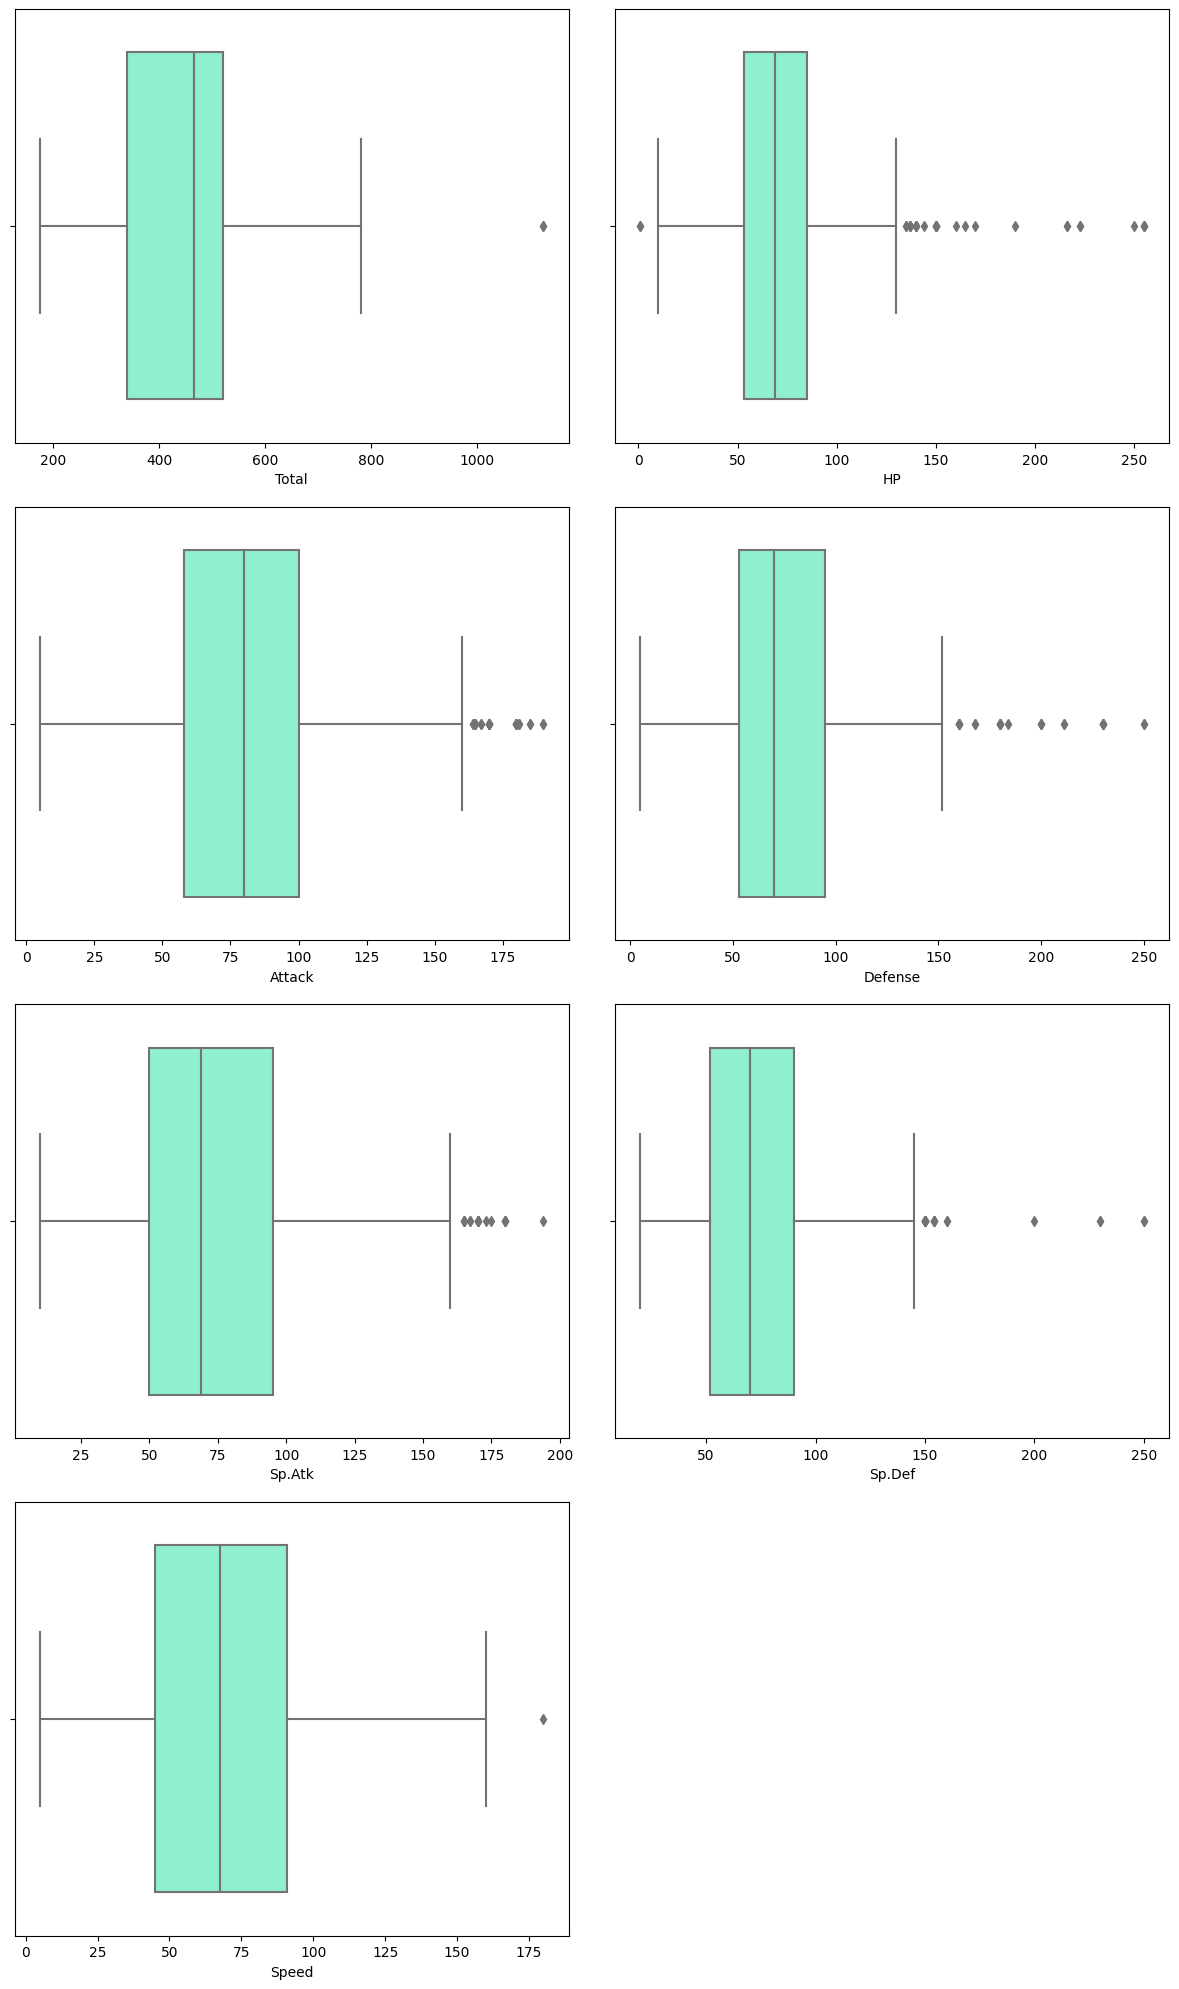

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    # para trazar una línea de densidad
    sns.boxplot(x=numericas[columna], data=df,
                ax=axes[indice], color="aquamarine")


plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()


In [17]:
def detectar_outliers(lista_columnas, dataframe):

    dicc_indices = {}  # creamos un diccionario donde almacenaremos índices de los outliers

    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:

        # calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)

        # calculamos el rango intercuartil
        IQR = Q3 - Q1

        # calculamos los límites
        outlier_step = 1.5 * IQR

        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(
            dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]

        # chequeamos si nuestro dataframe tiene alguna fila.
        if outliers_data.shape[0] > 0:

            # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
            dicc_indices[col] = (list(outliers_data.index))

    return dicc_indices


In [18]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, df)


In [19]:
ind.keys()


dict_keys(['Total', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed'])

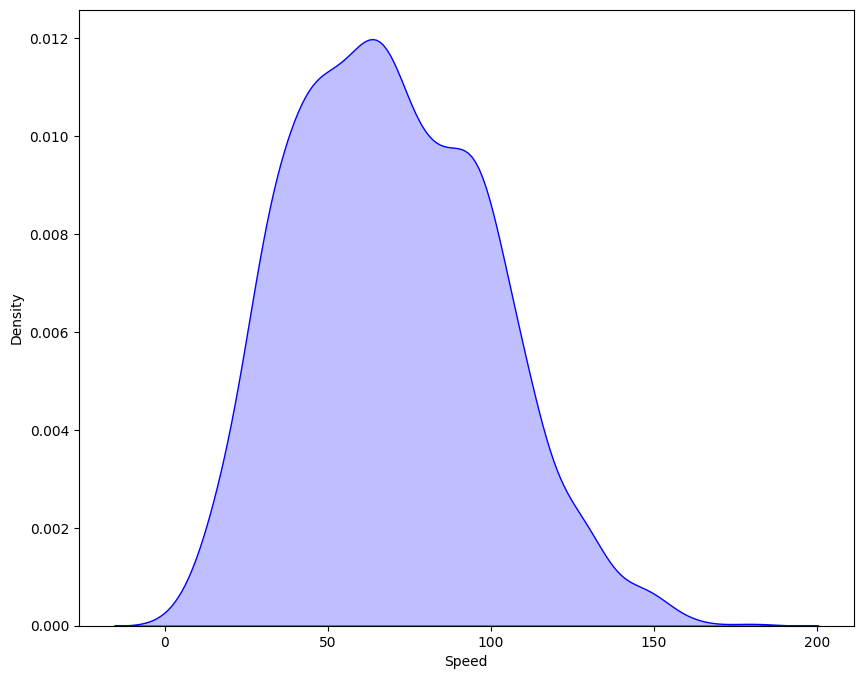

In [21]:

sns.distplot(
    df['Speed'],
    hist=False,
    color="blue",
    kde_kws={"shade": True, "linewidth": 1});


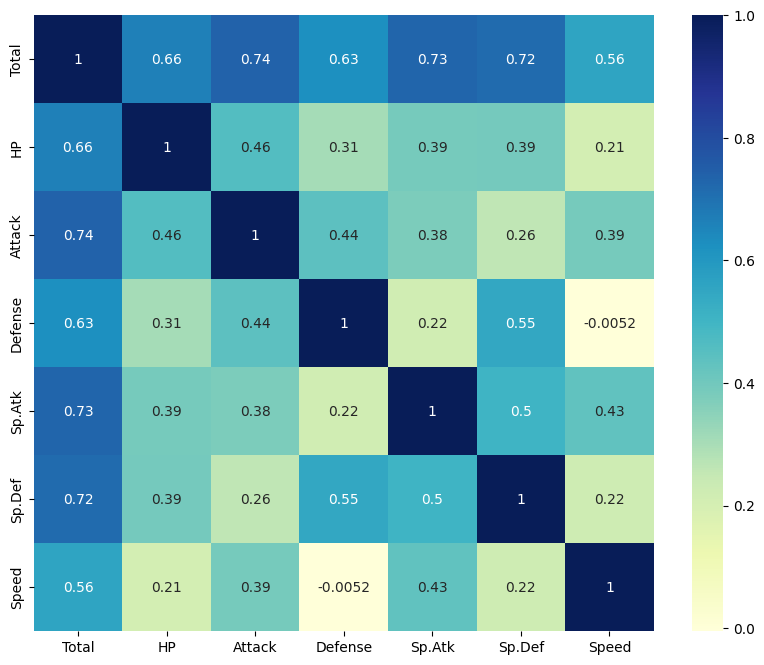

In [23]:
df_numericas = df.select_dtypes(include=np.number)
sns.heatmap(df_numericas.corr(),
            cmap="YlGnBu",
            annot=True);


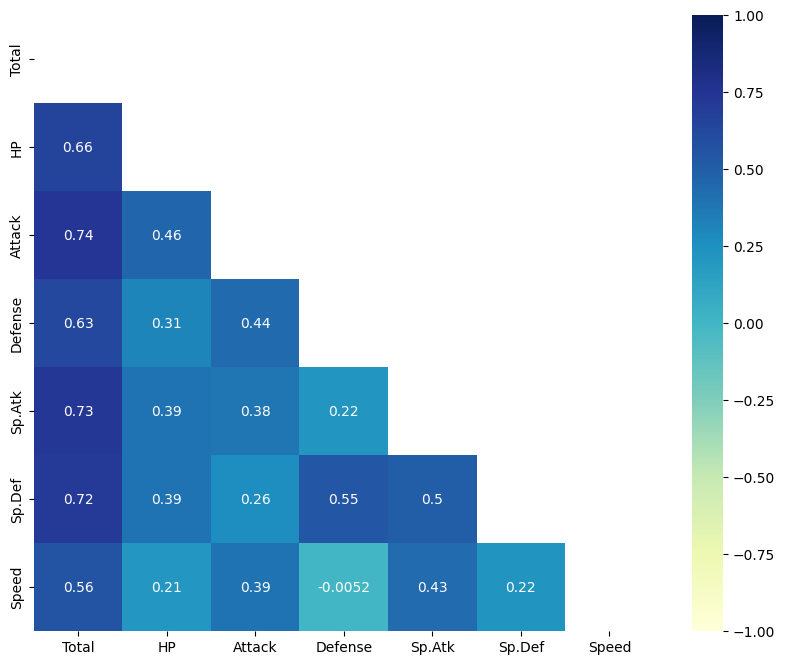

In [24]:
mask = np.triu(np.ones_like(df_numericas.corr(), dtype=np.bool_))

sns.heatmap(df_numericas.corr(),
            cmap="YlGnBu",
            mask=mask,
            annot=True,
            vmin=-1,
            vmax=1);


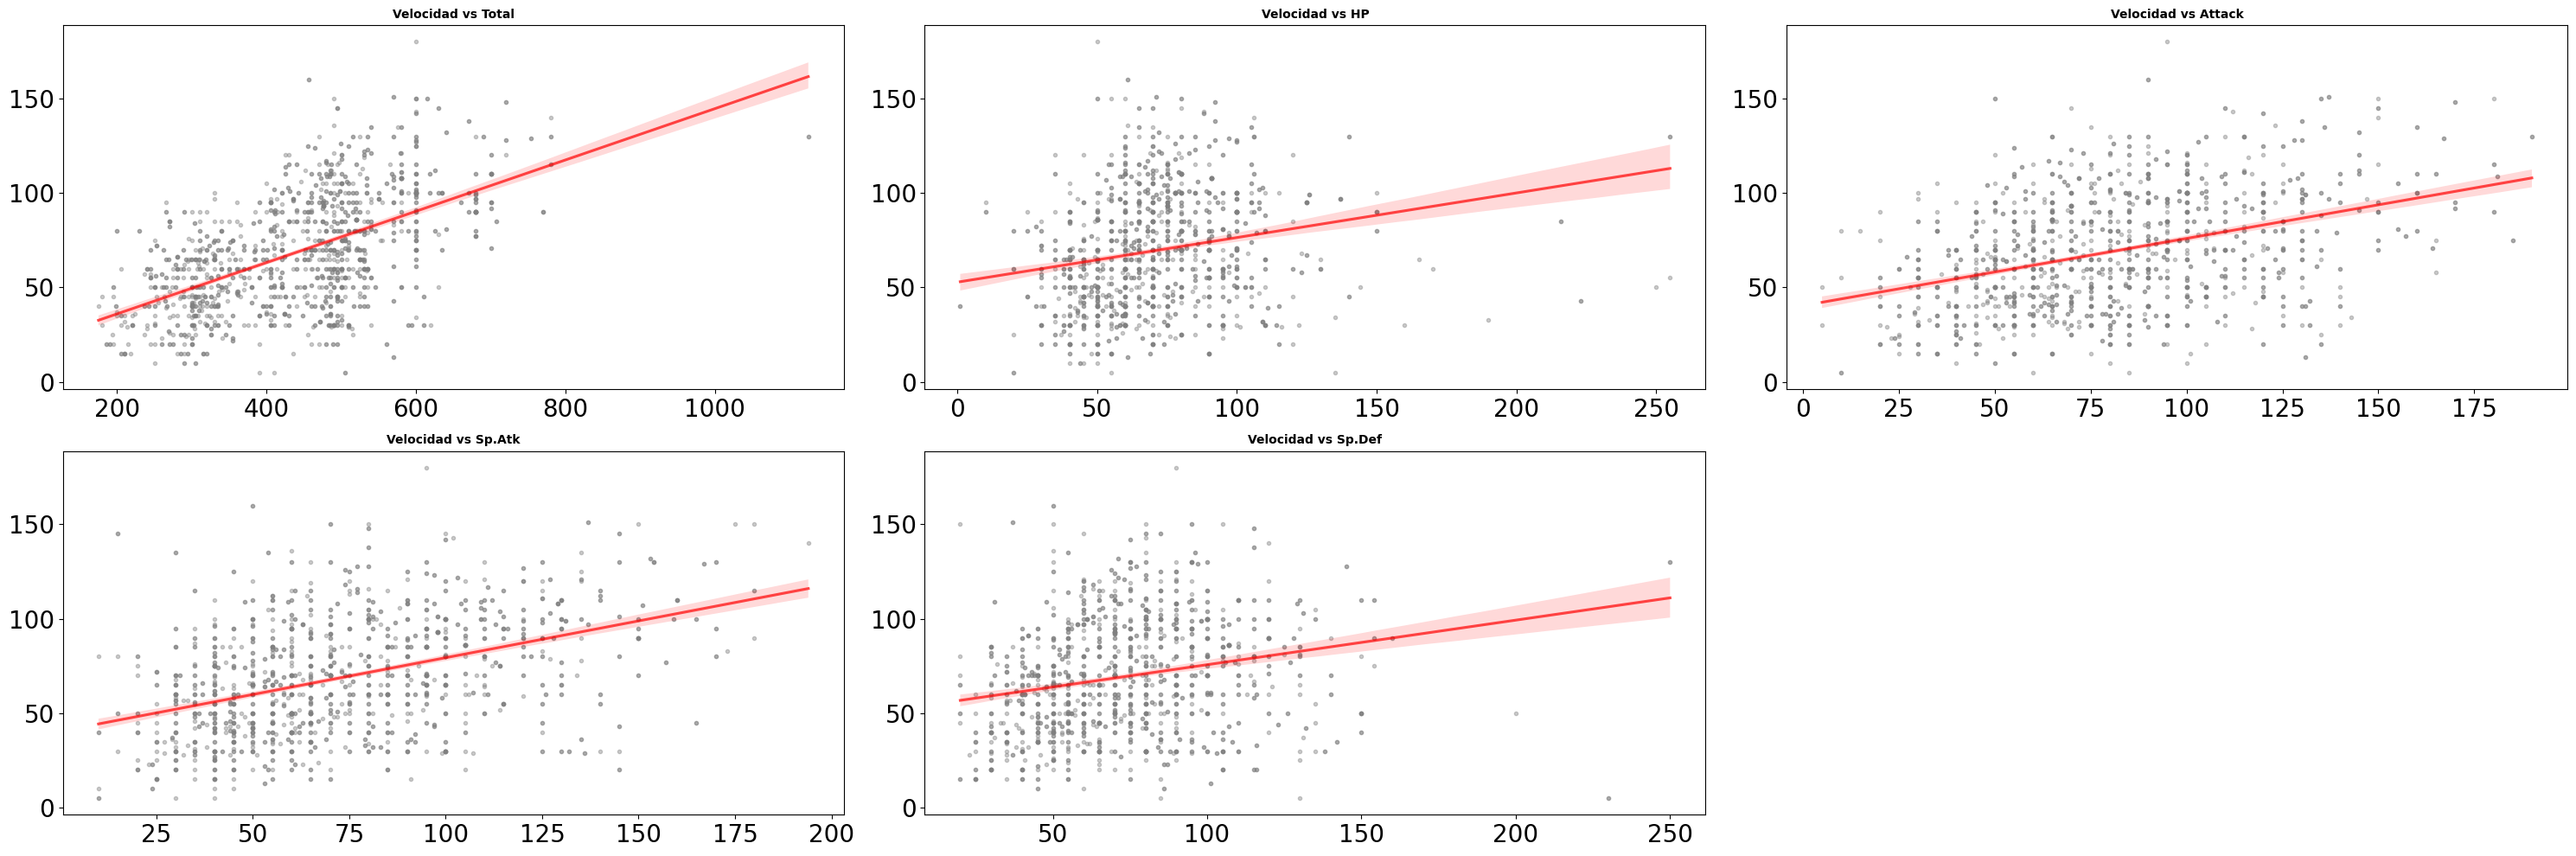

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))


axes = axes.flat

columnas_numeric = df.select_dtypes(include=np.number).columns
columnas_numeric = columnas_numeric.drop(["Speed", "Defense"])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x=df[colum],
        y=df["Speed"],
        color="gray",
        marker=".",
        scatter_kws={"alpha": 0.4},
        line_kws={"color": "red", "alpha": 0.7},
        ax=axes[i])

    axes[i].set_title(f"Velocidad vs {colum}", fontsize=10, fontweight="bold")
    axes[i].tick_params(labelsize=20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
fig.delaxes(axes[-1]);


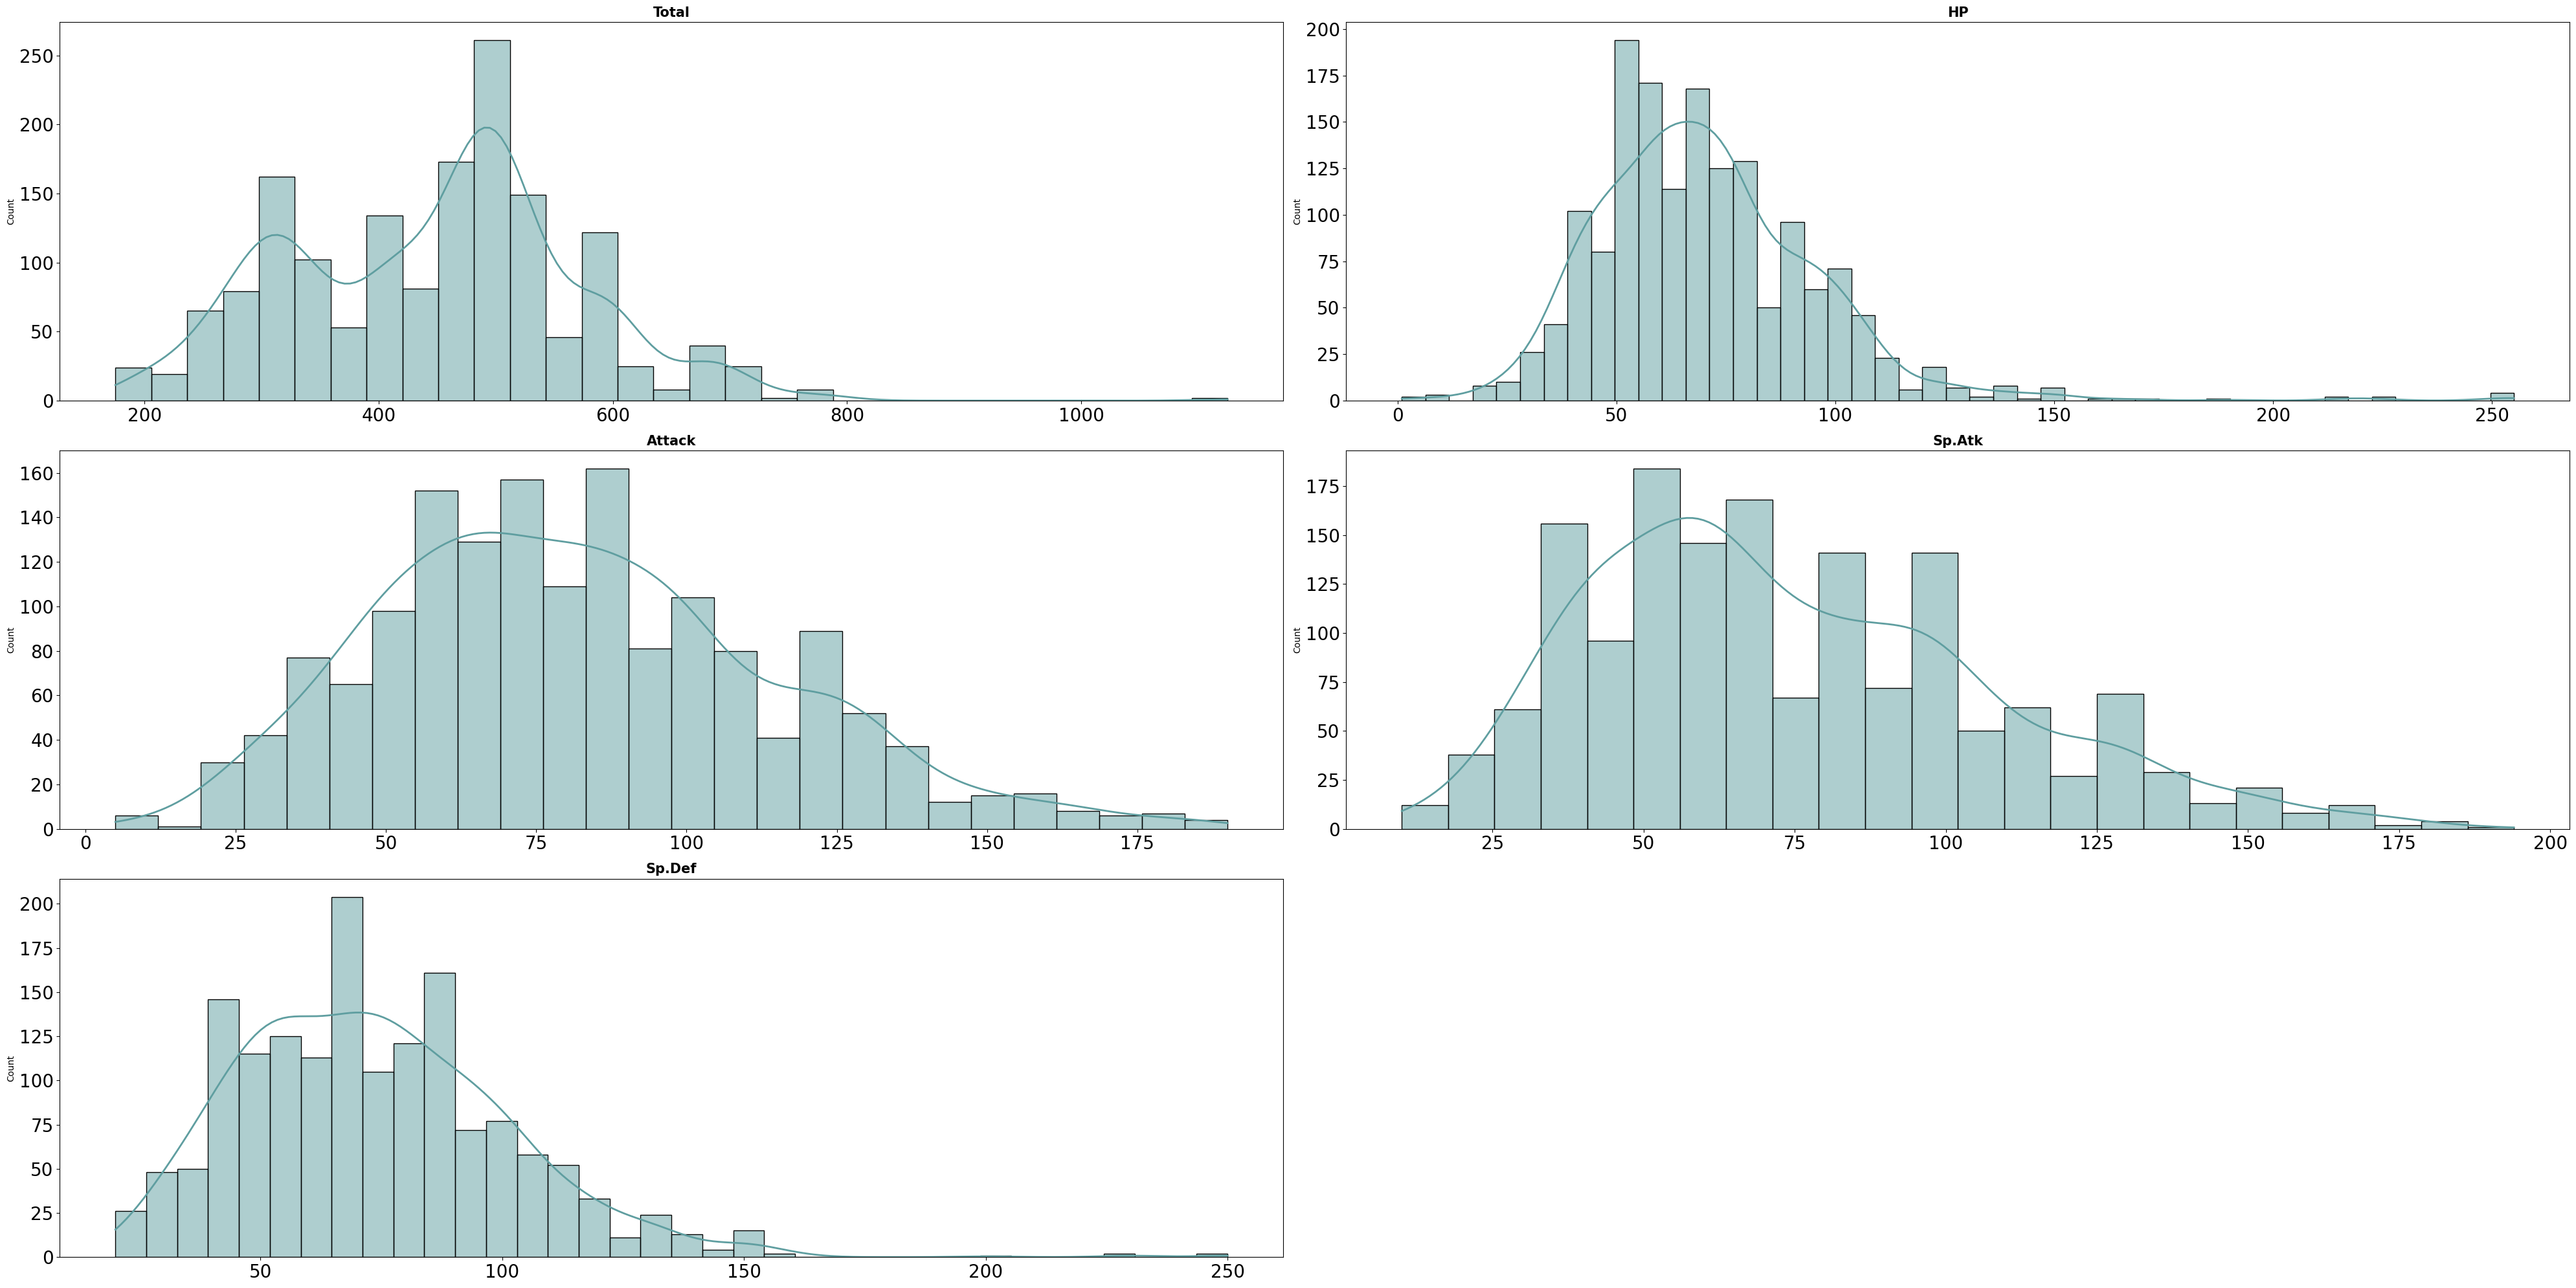

In [26]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(40, 20))


axes = axes.flat

columnas_numeric = df.select_dtypes(include=np.number).columns
columnas_numeric = columnas_numeric.drop(["Speed", "Defense"])

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data=df,
        x=colum,
        kde=True,
        color="cadetblue",
        # para indicar el ancho de las líneas de las barras
        line_kws={"linewidth": 2},
        alpha=0.5,  # para especificar la transparencia del color
        ax=axes[i])

    axes[i].set_title(colum, fontsize=15, fontweight="bold")
    axes[i].tick_params(labelsize=20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1]);
# fig.delaxes(axes[-2])
# fig.delaxes(axes[-3])


In [27]:
df.describe(include='object').T


,count,unique,top,freq
Type,1580,18,Water,154


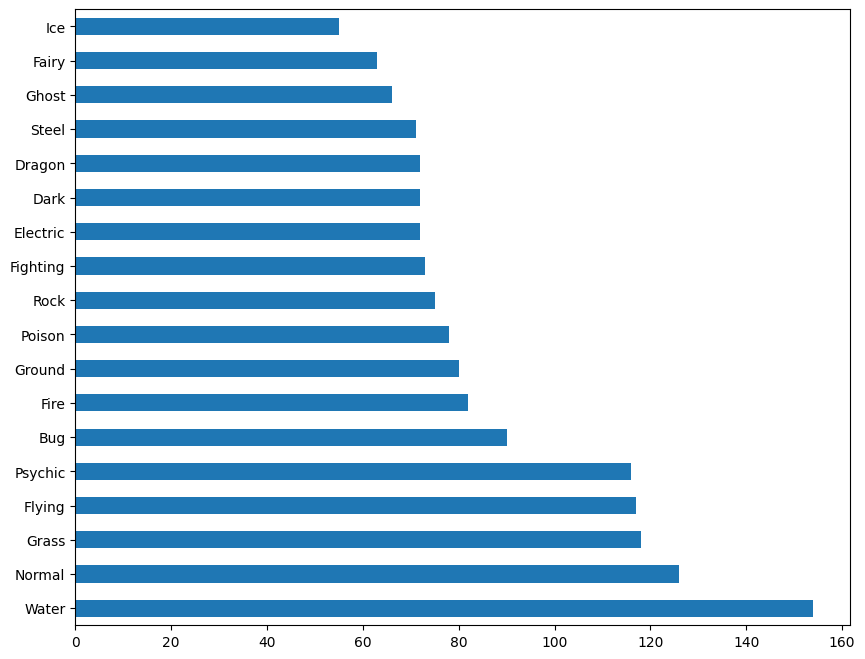

In [29]:
df['Type'].value_counts().plot.barh();


COMENTARIO:

- Una vez realizado el EDA, podemos ver que las distribuciones son relativamente normales, con una ligera tendencia positiva (hacia la derecha). 
- En todas las variables que hemos analizado tenemos outliers, que reflejan a los Pokémon que tienen unas caracteristicas muy altas, pero el conteo o la cantidad de ese tipo de Pokemon que nos podemos encontrar es reducida.
- Además, que tenga puntuaciones muy altas en una caracteristica no implica que las tenga en el resto de variables, por eso hemos decidido trabajar con los outliers.
- Al tener outliers la desviación típica es bastante alta en todos los estadísticos.


In [30]:
df.to_csv('../datos/pokePd1.csv')


In [31]:
df_copia.to_csv('../datos/poke_copia.csv')